In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [8]:
(train_img, train_lb), (test_img, test_lb) = tf.keras.datasets.mnist.load_data()

print(train_img.shape, train_lb.shape, test_img.shape, test_lb.shape, '\n')

# set random seed
np.random.seed(42)
trainsize = 10000  # number of training images we use, selected randomly
randtrain = np.random.choice(train_img.shape[0], trainsize, replace=False)
X_train, y_train = train_img[randtrain], train_lb[randtrain]

np.random.seed(10)
testsize = 10000  # number of testing images we use, selected randomly
randtest = np.random.choice(test_img.shape[0], testsize, replace=False)
X_test, y_test = test_img[randtest], test_lb[randtest]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,) 

(10000, 28, 28) (10000,) (10000, 28, 28) (10000,)


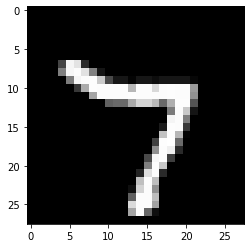

In [9]:
# demonstrate an image
plt.figure()
plt.imshow(X_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [10]:
# build the cnn model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [12]:
train_images = X_train.reshape((trainsize, 28, 28, 1))
train_images = (train_images.astype('float32') - 127.5) / 127.5

test_images = X_test.reshape((testsize, 28, 28, 1))
test_images = (test_images.astype('float32') - 127.5) / 127.5

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=100, epochs=15,
                    validation_data=(test_images, test_labels))

# test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/15
100/100 [==============================] - 4s 44ms/step - loss: 2.0562 - accuracy: 0.4442 - val_loss: 1.6129 - val_accuracy: 0.7036
Epoch 2/15
100/100 [==============================] - 5s 45ms/step - loss: 1.0470 - accuracy: 0.7767 - val_loss: 0.6146 - val_accuracy: 0.8504
Epoch 3/15
100/100 [==============================] - 6s 57ms/step - loss: 0.5198 - accuracy: 0.8592 - val_loss: 0.4059 - val_accuracy: 0.8856
Epoch 4/15
100/100 [==============================] - 6s 60ms/step - loss: 0.3868 - accuracy: 0.8879 - val_loss: 0.3282 - val_accuracy: 0.9055
Epoch 5/15
100/100 [==============================] - 6s 56ms/step - loss: 0.3221 - accuracy: 0.9051 - val_loss: 0.2808 - val_accuracy: 0.9206
Epoch 6/15
100/100 [==============================] - 5s 54ms/step - loss: 0.2820 - accuracy: 0.9197 - val_loss: 0.2549 - val_accuracy: 0.9273
Epoch 7/15
100/100 [==============================] - 6s 56ms/step - loss: 0.2518 - accuracy: 0.9275 - val_loss: 0.2278 - val_accuracy: 0.9335

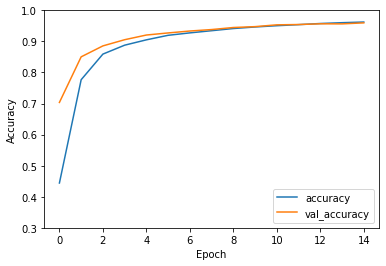

In [13]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')
plt.show()
# print('Test accuracy:', test_acc)

We can see that both training accuracy and testing are approximately 0.96 after 15 epochs.

[[6.8568243e-06 6.9982873e-04 9.7350216e-01 2.5178740e-02 4.1780787e-08
  2.3039405e-07 3.0347206e-05 8.8505876e-06 5.7245581e-04 5.4355633e-07]]
prediction: 2


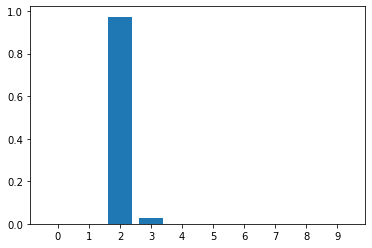

In [14]:
# demonstration: predict the ith test digit
i = 15
prediction = model.predict(test_images[i].reshape(1,28,28,1))

# get probability distribution and classification of the test digit
print(prediction)
print('prediction:', np.argmax(prediction))

# draw the barplot
plt.figure()
plt.bar(np.arange(0,10).astype('str'), prediction[0,:])
plt.show()

actual label: 2


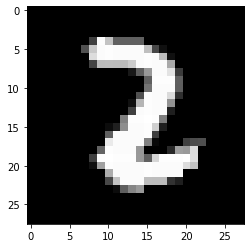

In [15]:
# show the actual ith digit
print('actual label:', np.argmax(test_labels[i]))
plt.figure()
plt.imshow(test_images[i,:,:,0], cmap='gray')
plt.show()

In [16]:
pred_labels = model.predict(test_images).argmax(axis=1)
true_labels = test_labels.argmax(axis=1)

Create confusion matrix and generate heatmap. This part is modified from https://androidkt.com/keras-confusion-matrix-in-tensorboard/

In [17]:
confusion_mat = tf.math.confusion_matrix(labels=true_labels, predictions=pred_labels).numpy()
confusion_mat

array([[ 967,    0,    2,    0,    0,    1,    7,    1,    2,    0],
       [   0, 1123,    3,    2,    0,    0,    4,    2,    1,    0],
       [   8,    1,  964,   10,   10,    3,    4,   17,   12,    3],
       [   1,    1,    7,  961,    0,   15,    1,   11,    8,    5],
       [   1,    1,    4,    0,  950,    0,    8,    4,    3,   11],
       [   5,    2,    0,    6,    0,  862,    8,    1,    3,    5],
       [   9,    4,    1,    0,    6,    5,  931,    1,    1,    0],
       [   0,    5,   20,    6,    5,    0,    0,  973,    3,   16],
       [   7,    1,    2,   11,    7,    7,    5,   10,  910,   14],
       [   7,    7,    0,    5,   10,    7,    1,   12,    4,  956]])

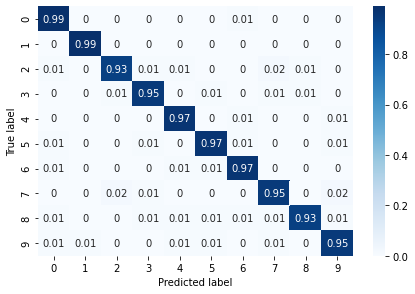

In [18]:
import pandas as pd
import seaborn as sns

# normalize
confusion_mat_norm = np.around(confusion_mat.astype('float') / np.atleast_2d(confusion_mat.sum(axis=1)).T, decimals=2)

classes = np.arange(0,10).astype('str')
confusion_mat_df = pd.DataFrame(confusion_mat_norm,
                                index = classes, 
                                columns = classes)

# generate heatmap
figure = plt.figure()
sns.heatmap(confusion_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()